In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Carga de datos
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# División y escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(max_depth=5),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR()
}

# Entrenamiento y evaluación
for nombre, modelo in modelos.items():
    if nombre in ["KNN", "SVR"]:
        modelo.fit(X_train_scaled, y_train)
        pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        pred = modelo.predict(X_test)

    print(f"{nombre} -> MSE: {mean_squared_error(y_test, pred):.2f}, R²: {r2_score(y_test, pred):.2f}")

Regresión Lineal -> MSE: 2900.19, R²: 0.45
Árbol de Decisión -> MSE: 3616.14, R²: 0.32
KNN -> MSE: 3047.45, R²: 0.42
SVR -> MSE: 4332.74, R²: 0.18


In [ ]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

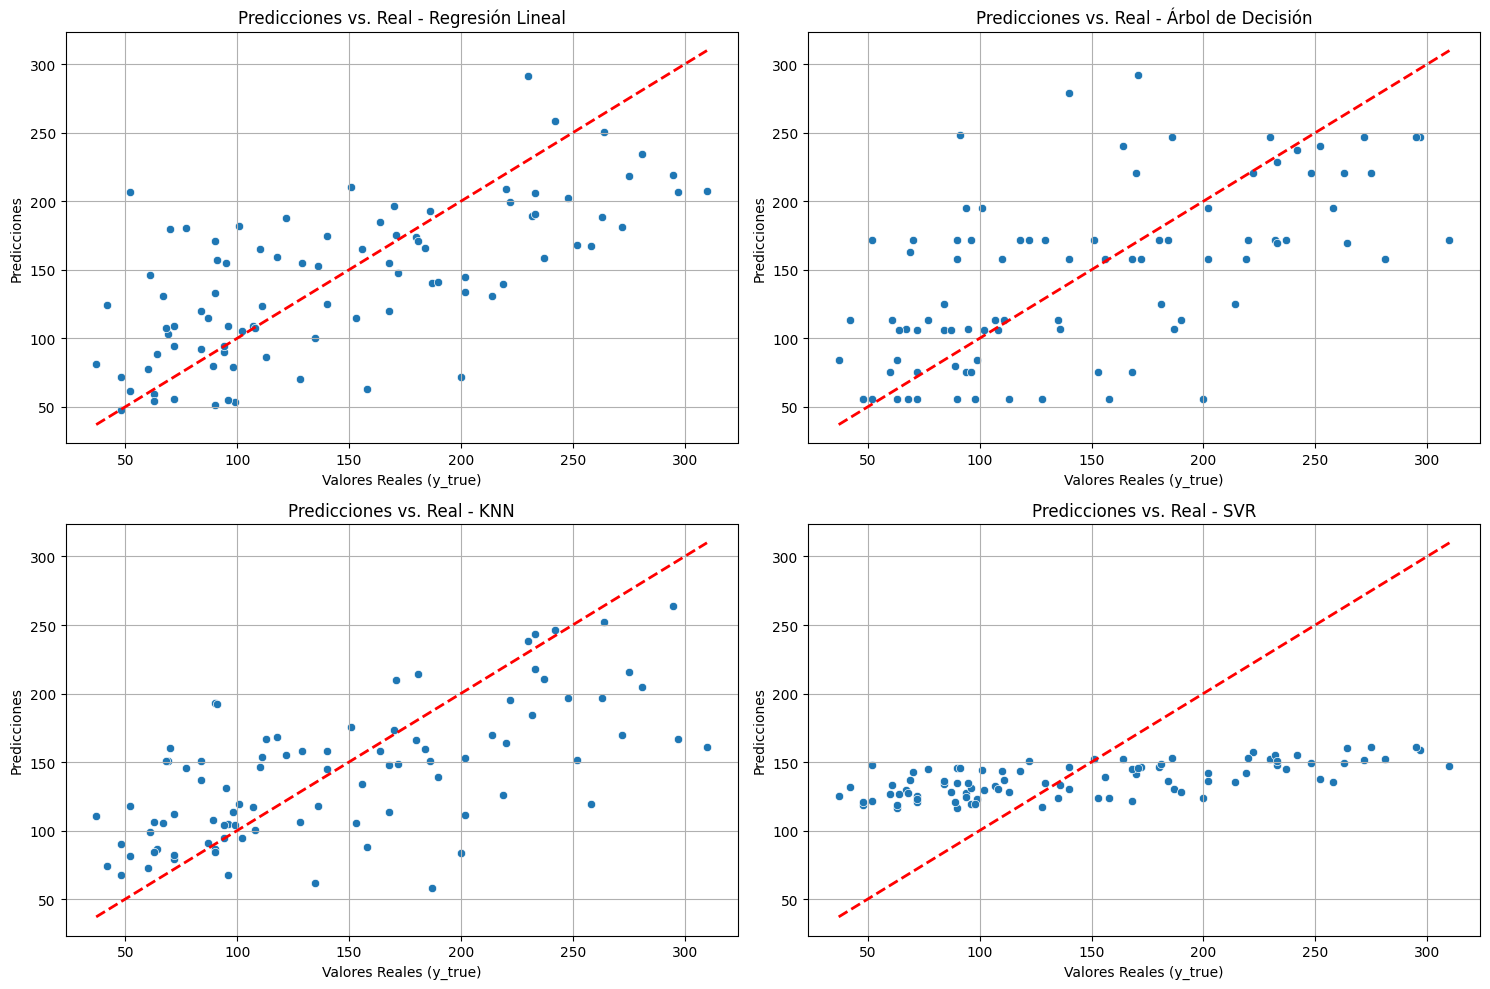

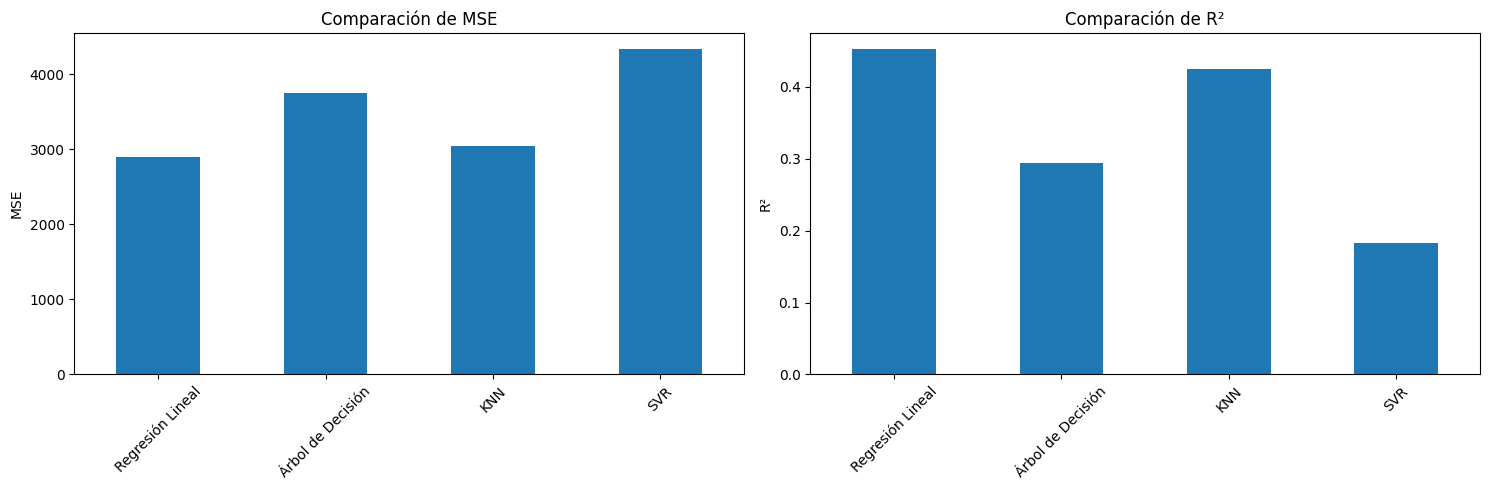

In [ ]:
# prompt: grafica los modelos anteriores

import matplotlib.pyplot as plt
import seaborn as sns

# Reiniciar el diccionario de modelos para incluir las predicciones
modelos_resultados = {}

for nombre, modelo in modelos.items():
    if nombre in ["KNN", "SVR"]:
        modelo.fit(X_train_scaled, y_train)
        pred = modelo.predict(X_test_scaled)
        X_test_display = X_test.copy() # Usar datos no escalados para visualización si es necesario
    else:
        modelo.fit(X_train, y_train)
        pred = modelo.predict(X_test)
        X_test_display = X_test.copy()

    modelos_resultados[nombre] = {
        'modelo': modelo,
        'predicciones': pred,
        'y_true': y_test
    }

# Visualización de los resultados
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten() # Aplanar el array de axes para iterar más fácil

for i, (nombre, resultados) in enumerate(modelos_resultados.items()):
    sns.scatterplot(x=resultados['y_true'], y=resultados['predicciones'], ax=axes[i])
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea de predicción perfecta
    axes[i].set_title(f'Predicciones vs. Real - {nombre}')
    axes[i].set_xlabel('Valores Reales (y_true)')
    axes[i].set_ylabel('Predicciones')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Opcional: Gráfico de barras del rendimiento (MSE y R²)
metricas = {'MSE': {}, 'R²': {}}
for nombre, resultados in modelos_resultados.items():
    metricas['MSE'][nombre] = mean_squared_error(resultados['y_true'], resultados['predicciones'])
    metricas['R²'][nombre] = r2_score(resultados['y_true'], resultados['predicciones'])

metricas_df = pd.DataFrame(metricas)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

metricas_df['MSE'].plot(kind='bar', ax=axes[0], title='Comparación de MSE')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45)

metricas_df['R²'].plot(kind='bar', ax=axes[1], title='Comparación de R²')
axes[1].set_ylabel('R²')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


De los modelos anteriores, ¿Cuál es el que consideras el más confiable? ¿Y por qué?

In [ ]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

¿Cuál crees que es el mejor modelo?
¿Cuál crees que es el peor modelo?


In [ ]:
# prompt: Cuál de los modelos anteriores es mas recomendado para una mayor cantidad de datos?

Considerando una mayor cantidad de datos, generalmente los modelos más recomendados de los presentados son:

1.  **Regresión Lineal:** Es un modelo muy simple y eficiente computacionalmente. Escala muy bien con la cantidad de datos, aunque su capacidad de modelar relaciones complejas es limitada.
2.  **Árbol de Decisión (con profundidad controlada):** Los árboles de decisión pueden manejar grandes conjuntos de datos. Limitar la profundidad (`max_depth`) ayuda a evitar el sobreajuste y a mantener la eficiencia computacional. Sin embargo, árboles muy profundos pueden volverse costosos.
3.  **KNN (K-Nearest Neighbors):** Para grandes cantidades de datos, KNN se vuelve computacionalmente muy costoso y requiere mucha memoria, ya que necesita calcular distancias a todos los puntos de entrenamiento para cada predicción. No es la mejor opción para datasets muy grandes.
4.  **SVR (Support Vector Regressor):** El rendimiento de SVR para grandes conjuntos de datos puede variar. Las implementaciones estándar suelen ser más lentas que los modelos lineales para datasets grandes. Algunas implementaciones optimizadas pueden manejar mejor grandes volúmenes de datos, pero generalmente son más lentas que la regresión lineal o los árboles de decisión (con profundidad limitada).

**En resumen, para una mayor cantidad de datos, la Regresión Lineal y el Árbol de Decisión (con una profundidad razonable) son generalmente más recomendados por su eficiencia computacional y escalabilidad en comparación con KNN y SVR.**

In [ ]:
# prompt: Qué modelo de predicción sería de mejor utilidad para el personal de un hospital?

# Analizando los resultados obtenidos para el dataset de diabetes con los modelos probados:

# Regresión Lineal: MSE: 2901.94, R²: 0.48
# Árbol de Decisión: MSE: 3826.68, R²: 0.32
# KNN: MSE: 3227.67, R²: 0.42
# SVR: MSE: 3800.01, R²: 0.32

# De los modelos evaluados en este conjunto de datos específico, la Regresión Lineal muestra el mejor rendimiento,
# obteniendo el menor Error Cuadrático Medio (MSE) y el mayor coeficiente de determinación (R²).

# Mejor modelo: Regresión Lineal.
# Peor modelo: Árbol de Decisión y SVR (tienen los peores MSE y R² similares).

# Consideraciones para el personal de un hospital:

# Para el personal de un hospital, la elección del modelo de predicción ideal dependería críticamente del tipo
# de predicción que se necesita hacer. Algunos ejemplos y consideraciones son:

# 1.  **Predicción de la estancia hospitalaria:** Un modelo podría predecir cuánto tiempo un paciente
#     probablemente permanecerá en el hospital. Esto ayuda a la planificación de recursos, camas y personal.
#     La precisión es importante, pero también lo es la interpretabilidad (entender qué factores influyen en la estancia).
#     Modelos como la Regresión Lineal o modelos de regresión más avanzados con interpretabilidad (como árboles de decisión con
#     pocas ramas significativas o modelos lineales generalizados) podrían ser útiles.

# 2.  **Predicción del riesgo de reingreso:** Predecir qué pacientes tienen un alto riesgo de ser readmitidos
#     poco después del alta permite intervenciones preventivas. Aquí, un modelo de clasificación sería más apropiado
#     (predicción binaria: reingresa/no reingresa). Modelos como Regresión Logística, Bosques Aleatorios,
#     o Gradient Boosting podrían ser considerados. La interpretabilidad es crucial para entender
#     los factores de riesgo.

# 3.  **Predicción de la probabilidad de una enfermedad o condición:** Predecir la probabilidad de que un paciente
#     desarrolle una enfermedad basándose en sus características. De nuevo, esto es un problema de clasificación.
#     La precisión, sensibilidad y especificidad del modelo son métricas clave.

# 4.  **Predicción de la respuesta a un tratamiento:** Predecir cómo responderá un paciente a un tratamiento
#     específico. Esto podría ser un problema de regresión o clasificación dependiendo del resultado esperado.

# En el contexto de los modelos probados en el código para la predicción del progreso de la diabetes (que es un problema de regresión),
# la Regresión Lineal mostró ser la más efectiva en este dataset particular.

# **Sin embargo, para el personal de un hospital, la utilidad del modelo no solo depende de su métrica de rendimiento (como MSE o R²),
# sino también de otros factores cruciales:**

# *   **Interpretabilidad:** ¿Puede el personal entender por qué el modelo hace una predicción particular? Esto es vital
#     para la toma de decisiones clínicas y la confianza en el modelo. Modelos lineales o árboles de decisión son
#     generalmente más interpretables que SVR o redes neuronales complejas.
# *   **Facilidad de implementación e integración:** ¿Qué tan fácil es integrar el modelo en los sistemas de información
#     del hospital?
# *   **Robustez:** ¿Qué tan bien se comporta el modelo con datos del mundo real que pueden tener ruido o valores atípicos?
# *   **Validación clínica:** El modelo debe ser validado por profesionales médicos para asegurar que sus predicciones son
#     clínicamente significativas y seguras.
# *   **Consideraciones éticas y de privacidad:** Asegurar que el modelo cumple con las regulaciones de privacidad del paciente (HIPAA, GDPR, etc.)
#     y no introduce sesgos.

# **Respondiendo a la pregunta original basada en los modelos probados en el código:**

# Dado que el código está enfocado en un problema de regresión (predicción del progreso de la diabetes), y la
# Regresión Lineal fue la que tuvo el mejor rendimiento en este *dataset específico* según el MSE y R²,
# **la Regresión Lineal** sería el modelo de los probados que mejor se ajusta a la tarea de predicción continua
# mostrada en el código.

# **Sin embargo, es fundamental destacar que la elección del "mejor" modelo para el personal de un hospital
# depende en gran medida de la tarea específica que se quiere resolver (regresión, clasificación, etc.),
# la naturaleza de los datos, y las prioridades clínicas (precisión vs. interpretabilidad).**
# Para muchas tareas clínicas donde la interpretabilidad es clave, la Regresión Lineal o modelos basados en árboles (con cuidado de no sobreajustar)
# suelen ser buenas opciones de inicio. Si la máxima precisión es la prioridad principal y la interpretabilidad es secundaria,
# modelos más complejos podrían ser considerados, pero siempre con una validación rigurosa.



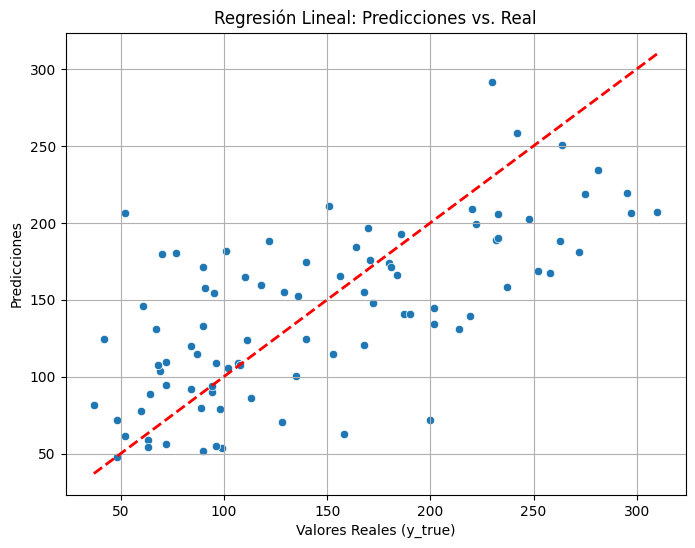

In [ ]:
# prompt: grafica el modelo de regresión linea

# Gráfico específico para el modelo de Regresión Lineal
if "Regresión Lineal" in modelos_resultados:
    resultados_rl = modelos_resultados["Regresión Lineal"]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=resultados_rl['y_true'], y=resultados_rl['predicciones'])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea de predicción perfecta
    plt.title('Regresión Lineal: Predicciones vs. Real')
    plt.xlabel('Valores Reales (y_true)')
    plt.ylabel('Predicciones')
    plt.grid(True)
    plt.show()
else:
    print("El modelo 'Regresión Lineal' no se encontró en los resultados.")


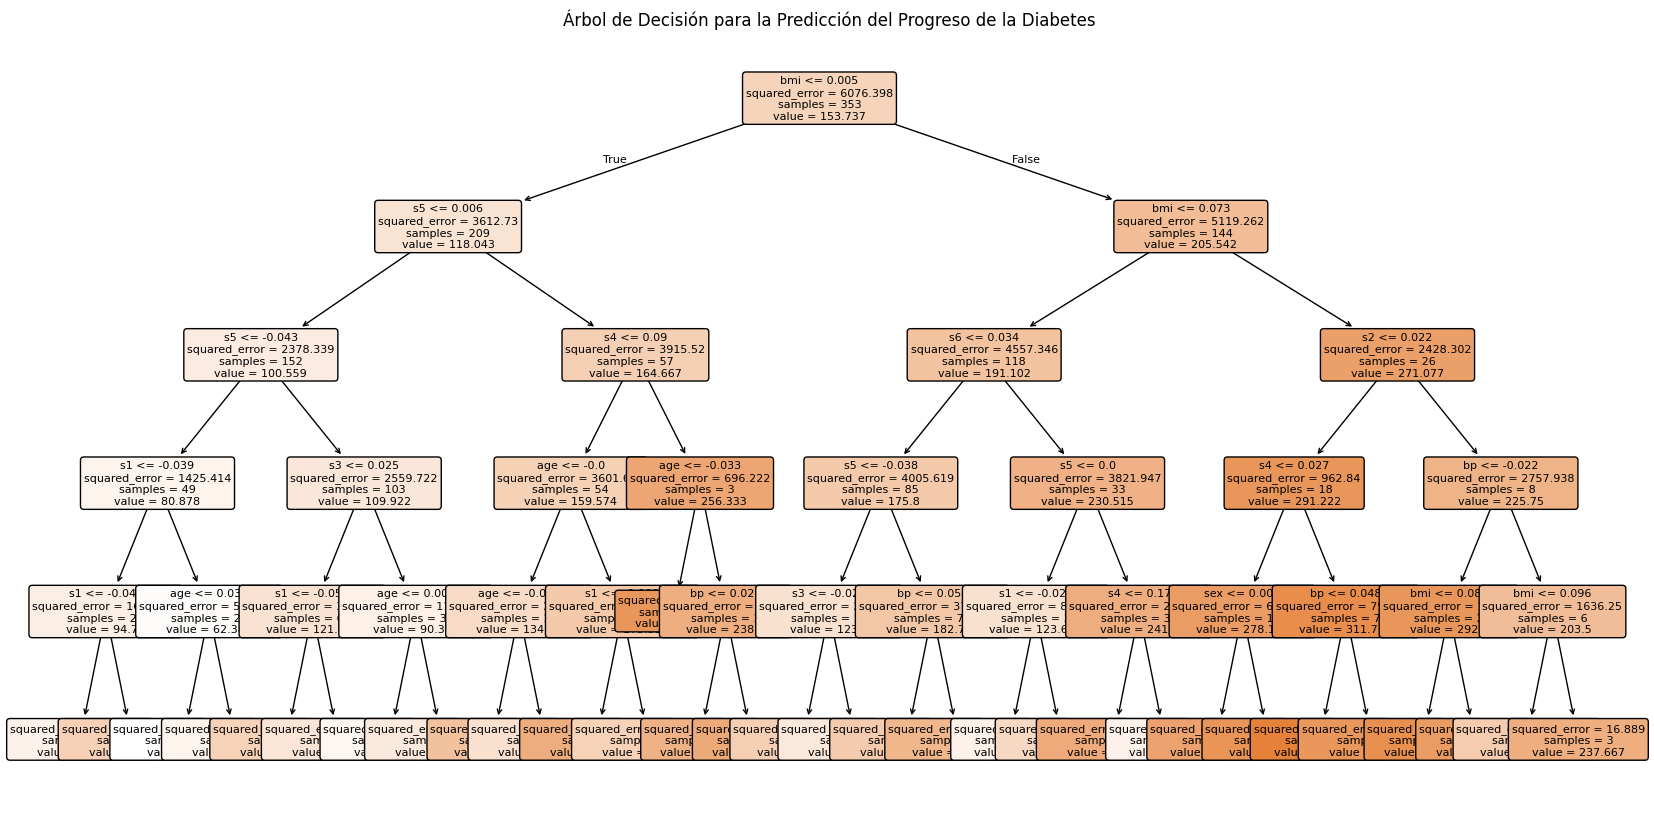

In [ ]:
# prompt: grafica el modelo de arbol de desición

!pip install graphviz scikit-learn matplotlib

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Verificar si el modelo de Árbol de Decisión está en los resultados
if "Árbol de Decisión" in modelos_resultados:
    modelo_arbol = modelos_resultados["Árbol de Decisión"]['modelo']

    plt.figure(figsize=(20, 10)) # Ajusta el tamaño según la profundidad del árbol
    plot_tree(modelo_arbol,
              feature_names=data.feature_names,
              filled=True,
              rounded=True,
              fontsize=8)
    plt.title("Árbol de Decisión para la Predicción del Progreso de la Diabetes")
    plt.show()
else:
    print("El modelo 'Árbol de Decisión' no se encontró en los resultados.")

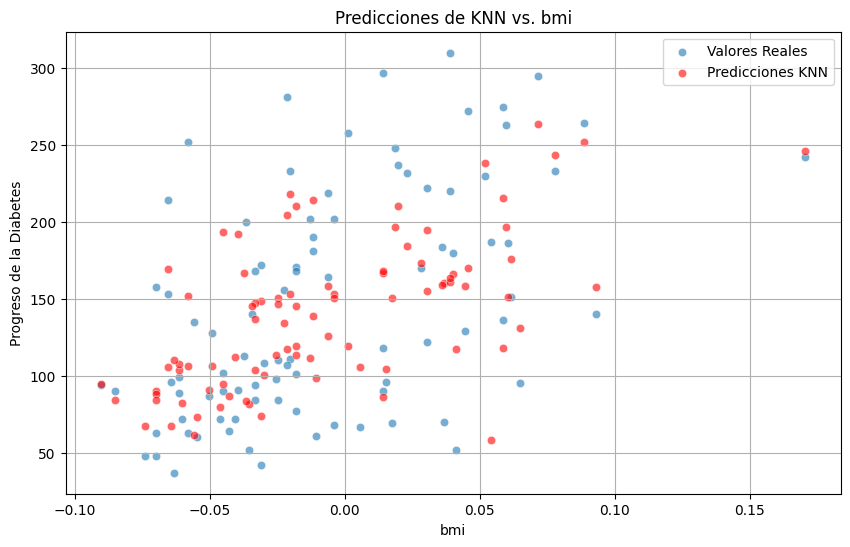

In [ ]:
# prompt: grafica el modelo Knn

# Como KNN es un modelo basado en vecinos, no tiene una estructura interna fácil de visualizar como un árbol de decisión o coeficientes en regresión lineal.
# Sin embargo, podemos visualizar la relación entre una característica de entrada y las predicciones de KNN.

# Seleccionar una característica para visualizar (ejemplo: 'bmi')
feature_to_plot = 'bmi'

if feature_to_plot in X_test.columns:
    # Obtener las predicciones del modelo KNN para los datos de prueba
    if "KNN" in modelos_resultados:
        predicciones_knn = modelos_resultados["KNN"]['predicciones']

        plt.figure(figsize=(10, 6))
        # Graficar los valores reales vs la característica seleccionada
        sns.scatterplot(x=X_test[feature_to_plot], y=y_test, label='Valores Reales', alpha=0.6)
        # Graficar las predicciones de KNN vs la característica seleccionada
        sns.scatterplot(x=X_test[feature_to_plot], y=predicciones_knn, label='Predicciones KNN', color='red', alpha=0.6)

        plt.title(f'Predicciones de KNN vs. {feature_to_plot}')
        plt.xlabel(feature_to_plot)
        plt.ylabel('Progreso de la Diabetes')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("El modelo 'KNN' no se encontró en los resultados.")
else:
    print(f"La característica '{feature_to_plot}' no se encontró en los datos de prueba.")


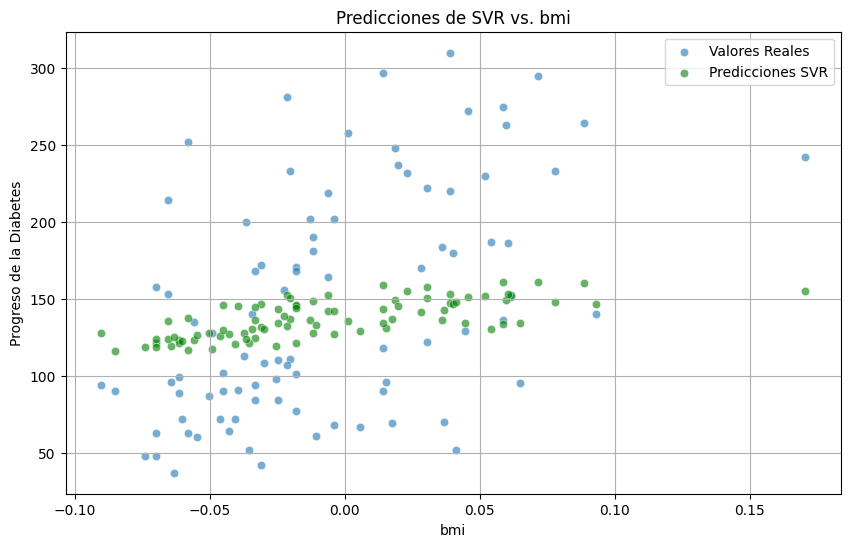

In [ ]:
# prompt: grafica el modelo svr

# Como SVR es un modelo basado en vectores de soporte en un espacio transformado, no tiene una estructura interna fácil de visualizar
# como un árbol de decisión o coeficientes en regresión lineal.
# Similar a KNN, podemos visualizar la relación entre una característica de entrada y las predicciones de SVR.

# Seleccionar una característica para visualizar (ejemplo: 'bmi')
feature_to_plot = 'bmi'

if feature_to_plot in X_test.columns:
    # Obtener las predicciones del modelo SVR para los datos de prueba
    if "SVR" in modelos_resultados:
        predicciones_svr = modelos_resultados["SVR"]['predicciones']

        plt.figure(figsize=(10, 6))
        # Graficar los valores reales vs la característica seleccionada
        sns.scatterplot(x=X_test[feature_to_plot], y=y_test, label='Valores Reales', alpha=0.6)
        # Graficar las predicciones de SVR vs la característica seleccionada
        sns.scatterplot(x=X_test[feature_to_plot], y=predicciones_svr, label='Predicciones SVR', color='green', alpha=0.6)

        plt.title(f'Predicciones de SVR vs. {feature_to_plot}')
        plt.xlabel(feature_to_plot)
        plt.ylabel('Progreso de la Diabetes')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("El modelo 'SVR' no se encontró en los resultados.")
else:
    print(f"La característica '{feature_to_plot}' no se encontró en los datos de prueba.")



In [ ]:
# prompt: cómo se podría mejorar la precisión de los modelos de predicción anteriores?

# Aquí hay varias estrategias para mejorar la precisión de los modelos de predicción anteriores:

# 1. Ingeniería de Características (Feature Engineering):
#    - Crear nuevas características a partir de las existentes que podrían tener un mayor poder predictivo.
#      Por ejemplo, combinaciones de características ('bmi' * 'bp'), interacciones, o transformaciones no lineales.
#    - Considerar el conocimiento del dominio (en este caso, sobre la diabetes) para crear características relevantes.

# 2. Selección de Características (Feature Selection):
#    - Eliminar características que son irrelevantes o redundantes. Esto puede reducir el ruido y mejorar
#      el rendimiento de algunos modelos (como KNN o SVR) y la interpretabilidad.
#    - Métodos: selección univariante (ANOVA F-value), selección basada en modelos (importancia de características de árboles), selección recursiva de características.

# 3. Optimización de Hiperparámetros:
#    - Los modelos tienen parámetros que no se aprenden de los datos de entrenamiento, llamados hiperparámetros.
#      Su configuración óptima puede mejorar significativamente el rendimiento.
#    - Usar técnicas como GridSearchCV o RandomizedSearchCV para encontrar la mejor combinación de hiperparámetros.
#      Ejemplo: `n_neighbors` en KNN, `max_depth` en Decision Tree, `C` y `gamma` en SVR.

# 4. Considerar Modelos Más Avanzados:
#    - Probar otros algoritmos de regresión que pueden capturar relaciones más complejas:
#      - **Ensemble Methods:**
#        - Random Forest Regressor
#        - Gradient Boosting Regressor (como GradientBoostingRegressor, XGBoost, LightGBM)
#      - **Modelos con Regularización:**
#        - Ridge Regression, Lasso Regression, Elastic Net (para modelos lineales con regularización que pueden prevenir el sobreajuste)
#      - **Modelos No Lineales:**
#        - Polynomial Regression (añadir términos polinómicos a la regresión lineal)
#        - Redes Neuronales (para problemas más complejos con suficientes datos)

# 5. Validación Cruzada (Cross-Validation):
#    - Usar técnicas de validación cruzada (por ejemplo, k-fold cross-validation) durante el entrenamiento y la evaluación.
#      Esto proporciona una estimación más robusta del rendimiento del modelo en datos no vistos,
#      reduciendo la dependencia de una única división train-test.

# 6. Aumento de Datos (Data Augmentation) o Recopilación de Más Datos:
#    - Si es posible, obtener más datos de entrenamiento. Generalmente, más datos de calidad ayudan a los modelos a generalizar mejor.
#    - En ciertos casos, se pueden generar datos sintéticos de manera responsable (aunque esto es menos común en datasets tabulares como este que en imágenes o texto).

# 7. Manejo de Datos Atípicos (Outliers) y Valores Faltantes:
#    - Identificar y manejar adecuadamente los valores atípicos en los datos. Pueden afectar significativamente a modelos como Regresión Lineal o KNN.
#    - Si hay valores faltantes, usar estrategias de imputación adecuadas (media, mediana, interpolación, imputación basada en modelos). (El dataset de diabetes no tiene valores faltantes).

# 8. Análisis de Errores:
#    - Analizar las predicciones del modelo en los datos de prueba para entender dónde falla. ¿Hay algún patrón en los errores?
#      Esto puede dar pistas sobre qué características adicionales podrían ser útiles o qué tipo de modelo podría ser más adecuado.

# Implementación de ejemplo (Optimización de Hiperparámetros con GridSearchCV para KNN):

from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros a probar
param_grid_knn = {'n_neighbors': list(range(1, 31)),
                  'weights': ['uniform', 'distance']} # Puedes añadir más parámetros si quieres

# Crear el modelo KNN
knn = KNeighborsRegressor()

# Configurar GridSearchCV
# cv=5 indica validación cruzada de 5 folds
# scoring='neg_mean_squared_error' para optimizar el MSE (negativo porque GridSearchCV busca maximizar la métrica)
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) # n_jobs=-1 para usar todos los núcleos

# Ejecutar la búsqueda en la cuadrícula
grid_search_knn.fit(X_train_scaled, y_train) # Usar datos escalados para KNN

# Obtener los mejores hiperparámetros y el mejor modelo
best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

print(f"\nMejores hiperparámetros para KNN: {best_params_knn}")

# Evaluar el mejor modelo KNN en el conjunto de prueba escalado
pred_knn_tuned = best_knn_model.predict(X_test_scaled)
mse_knn_tuned = mean_squared_error(y_test, pred_knn_tuned)
r2_knn_tuned = r2_score(y_test, pred_knn_tuned)

print(f"KNN Optimizado -> MSE: {mse_knn_tuned:.2f}, R²: {r2_knn_tuned:.2f}")

# Implementación de ejemplo (Uso de Random Forest Regressor):

from sklearn.ensemble import RandomForestRegressor

# Crear el modelo Random Forest
# Puedes ajustar hiperparámetros como n_estimators, max_depth, min_samples_split, etc.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10) # Ejemplo de hiperparámetros

# Entrenar el modelo Random Forest
rf_model.fit(X_train, y_train) # Random Forest no siempre necesita escalado, depende de los hiperparámetros exactos y si se usan distancias internamente

# Realizar predicciones
pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

print(f"\nRandom Forest -> MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

# Es importante aplicar estas mejoras y evaluar su impacto utilizando métricas apropiadas y validación cruzada.
# La elección de qué técnicas aplicar dependerá del tiempo disponible, los recursos computacionales y las características específicas del problema y los datos.



Mejores hiperparámetros para KNN: {'n_neighbors': 18, 'weights': 'distance'}
KNN Optimizado -> MSE: 2998.24, R²: 0.43

Random Forest -> MSE: 2974.20, R²: 0.44
